In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
tasas_28=pd.read_excel('historico_tasas_cetes.xlsx',sheet_name='28-dias')
tasas_90=pd.read_excel('historico_tasas_cetes.xlsx',sheet_name='91-dias')
tasas_182=pd.read_excel('historico_tasas_cetes.xlsx',sheet_name='182-dias')
tasas_364=pd.read_excel('historico_tasas_cetes.xlsx',sheet_name='364-dias')

In [3]:
tasas_28['tasa'].plot();

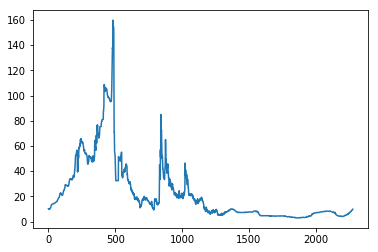

In [4]:
tasas_90['tasa'].plot();


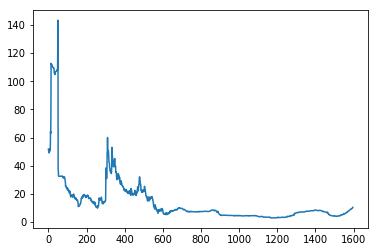

In [5]:
tasas_182['tasa'].plot();

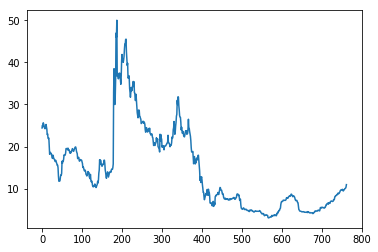

In [6]:
tasas_364['tasa'].plot();

$$ r_{t}=\beta_{0} + \beta_{1}r_{t-1} + \sigma \epsilon_{t} $$


Donde:

$e_{t} - N(0,\sigma^{2})$



$\beta_{0}=ab$

$\beta_{1}=1-a$

$E[r_{t}]=\frac{\beta_{0}}{(1-\beta_{1})}=b$

$Var[r_{t}]=\frac{\sigma^2}{(1-\beta_{1})^2}=\frac{\sigma^2}{[1-(1-a)^2]}$



In [7]:
def tasa_vasicek(data):
    var=data.var()
    b=data.mean()
    delta=np.diff(data)
    lag=data[:-1]
    model=sm.OLS(delta,lag).fit()
    a=-float(model.params)
    mu, sigma = 0,var
    norm = np.random.normal(mu, sigma)
    b_0=a*b
    b_1=1-a
    return b_0+b_1*data.iloc[-1]+var**(1/2)*norm

In [8]:
tasa_vasicek(tasas_28['tasa']/100)

0.08794061583991887

In [9]:
tasa_vasicek(tasas_90['tasa']/100)

0.08709919119601775

In [10]:
tasa_vasicek(tasas_182['tasa']/100)

0.10585412412342983

In [11]:
tasa_vasicek(tasas_364['tasa']/100)


0.10910762258497943